In [1]:
!pip install wordcloud
!pip install gensim

# Análise de Currículos



In [2]:
# Processamento de dados 
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
# import gensim
import re
# from gensim.utils import simple_preprocess
# from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

# Ensure that necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/gabiiwa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabiiwa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Currículos do projeto ["Resume Dataset"](https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset/data)


In [3]:
df = pd.read_csv('../dados/Resume/Resume.csv')
df.rename(columns={"Resume_str":"Resume"},inplace=True,errors='ignore')
display(df.head())
display(f"Quantas entradas:{df.shape[0]}")

,ID,Resume,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


'Quantas entradas:2484'

In [4]:
# drop not using columns
df.drop(columns = ['ID', 'Resume_html'], inplace = True,errors='ignore')

In [5]:
df.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

## Currículos do projeto ["Updated Resume Dataset"](https://www.kaggle.com/datasets/jillanisofttech/updated-resume-dataset/data)


In [6]:
df_update = pd.read_csv("../dados/update_resume/UpdatedResumeDataSet.csv")

display(df_update.head())
display(f"Quantas entradas:{df_update.shape[0]}")

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


'Quantas entradas:962'

In [7]:
df_update.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df_update["Category"] = df_update.Category.str.upper()
df_update

,Category,Resume
0,DATA SCIENCE,Skills * Programming Languages: Python (pandas...
1,DATA SCIENCE,Education Details \r\nMay 2013 to May 2017 B.E...
2,DATA SCIENCE,"Areas of Interest Deep Learning, Control Syste..."
3,DATA SCIENCE,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,DATA SCIENCE,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,TESTING,Computer Skills: â¢ Proficient in MS office (...
958,TESTING,â Willingness to accept the challenges. â ...
959,TESTING,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,TESTING,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


## Analisando o dataset em conjunto

In [9]:
df_curr = pd.concat([df,df_update],ignore_index=True)
df_curr

,Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
3441,Computer Skills: â¢ Proficient in MS office (...,TESTING
3442,â Willingness to accept the challenges. â ...,TESTING
3443,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",TESTING
3444,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,TESTING


In [10]:
df_curr.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION',
       'DATA SCIENCE', 'WEB DESIGNING', 'MECHANICAL ENGINEER',
       'HEALTH AND FITNESS', 'CIVIL ENGINEER', 'JAVA DEVELOPER',
       'BUSINESS ANALYST', 'SAP DEVELOPER', 'AUTOMATION TESTING',
       'ELECTRICAL ENGINEERING', 'OPERATIONS MANAGER', 'PYTHON DEVELOPER',
       'DEVOPS ENGINEER', 'NETWORK SECURITY ENGINEER', 'PMO', 'DATABASE',
       'HADOOP', 'ETL DEVELOPER', 'DOTNET DEVELOPER', 'BLOCKCHAIN',
       'TESTING'], dtype=object)

In [11]:
display(df.describe())
print(f'Valores nulos? {True if sum(df_curr.isna().any())>0 else False}')
# print(f'Valores duplicados? {True if df_curr.duplicated().sum()>0 else False}')

,Resume,Category
count,2484,2484
unique,2482,24
top,STOREKEEPER II Professional Sum...,INFORMATION-TECHNOLOGY
freq,2,120


Valores nulos? False


In [12]:
df_curr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3446 entries, 0 to 3445
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    3446 non-null   object
 1   Category  3446 non-null   object
dtypes: object(2)
memory usage: 54.0+ KB


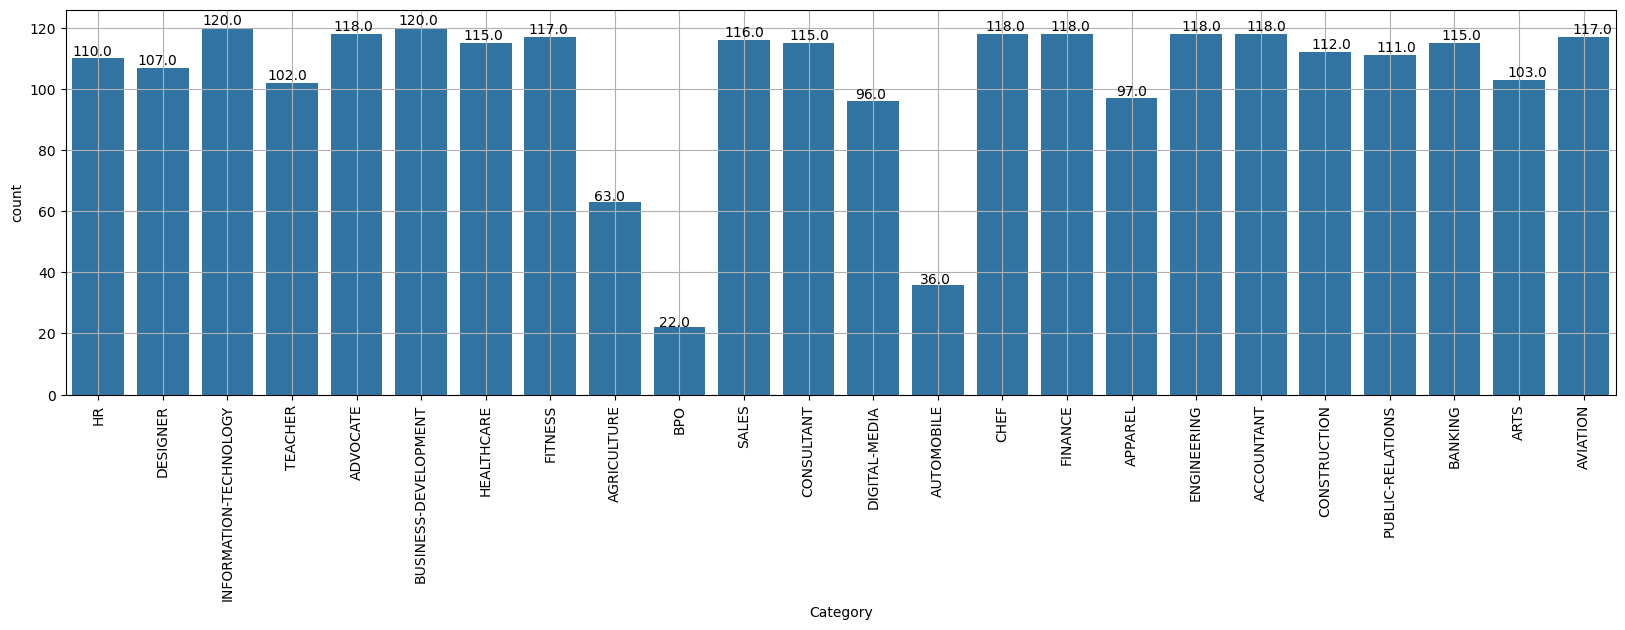

In [13]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

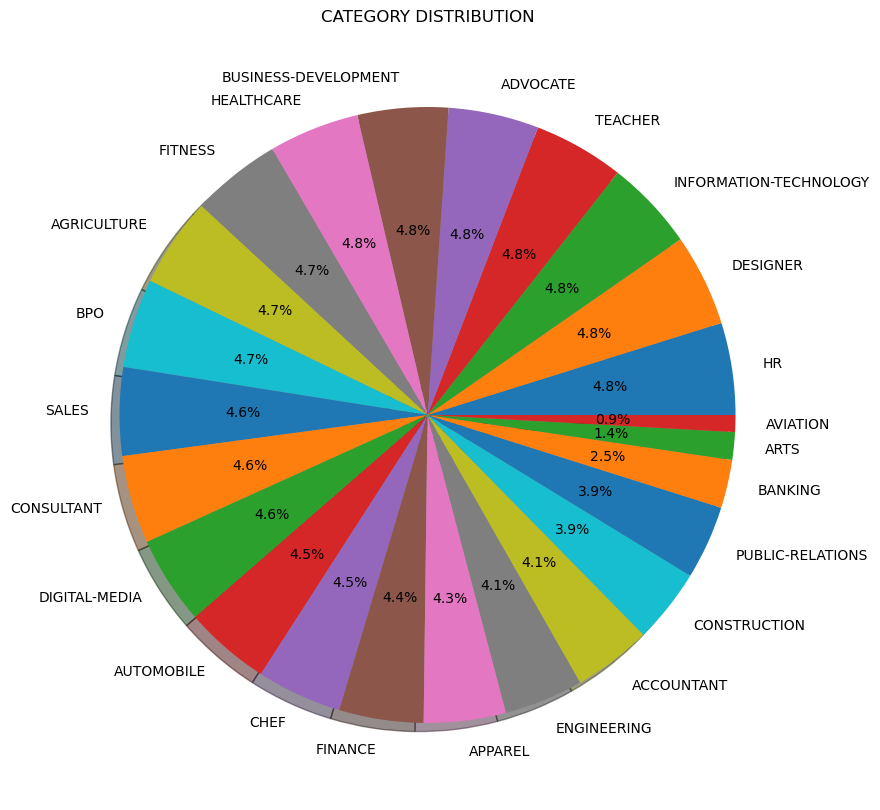

In [14]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

## Pré-processamento
* Limpar o texto removendo caracteres especiais, pontuações e espaços extras.
* Converter o texto para maiúscula para padronização.
* Remover stop words (palavras comuns que não contribuem para a análise).
* Tokenizar usando o nltk


In [15]:
def preprocess(txt):
    # convertendo o texto para maiuscula
    txt = txt.upper()
    # removendo caracteres especiais, espaços extras, pontuações e números
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # removendo URLs
    txt = re.sub('RT|cc', ' ', txt)  # removendo informações desnecessárias
    txt = re.sub('#\S+', '', txt)  # removendo hashtags
    txt = re.sub('@\S+', '  ', txt)  # removendo menções
    txt = re.sub('\s+', ' ', txt)  # removendo espaçoes extras
    # tokenize
    txt = nltk.tokenize.word_tokenize(txt)
    # removendo stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]


    return ' '.join(txt)

In [16]:
df_curr["resume_cleaned"] = df_curr["Resume"].apply(lambda x:preprocess(x))

In [17]:
df_curr

,Resume,Category,resume_cleaned
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMINI...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,HR SPECIALIST US HR OPERATIONS SUMMARY VERSATI...
2,HR DIRECTOR Summary Over 2...,HR,HR DIRECTOR SUMMARY OVER YEARS EXPERIENCE IN R...
3,HR SPECIALIST Summary Dedica...,HR,HR SPECIALIST SUMMARY DEDICATED DRIVEN AND DYN...
4,HR MANAGER Skill Highlights ...,HR,HR MANAGER SKILL HIGHLIGHTS HR SKILLS HR DEPA ...
...,...,...,...
3441,Computer Skills: â¢ Proficient in MS office (...,TESTING,COMPUTER SKILLS PROFICIENT IN MS OFFICE WORD B...
3442,â Willingness to accept the challenges. â ...,TESTING,WILLINGNESS TO ACCEPT THE CHALLENGES POSITIVE ...
3443,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",TESTING,PERSONAL SKILLS QUICK LEARNER EAGERNESS TO LEA...
3444,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,TESTING,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS POWER PO...


In [18]:
df_curr.to_csv("resume_tokenizado.csv",sep=';')

## Reconhecimento de Entidades Nomeadas (NER)